# DESCRIPTIVE STATISTICS

# 1.0 DATA CLEANING

In [1]:
# ! pip install --upgrade pip
# ! pip install missingno lazypredict scikit-optimize statsmodels axis utils.py

In [2]:
import pandas as pd
import missingno as msno
import utils as eda

In [23]:
df_original = pd.read_csv("./original_data.csv")

## 1.0.0. General information about dataset, including th number of rows and columns, missing values, and data types:

In [4]:
df_original.head(6)

,codigo_comunidad,comunidad,name,year,precio,IPC,edad_media,mano_obra,precio_Acero,precio_Aluminio,precio_Cemento,precio_Ceramica,precio_Cobre,precio_Energía,precio_Ligantes,precio_Madera,num_hipotecas,num_inmigracion
0,1,andalucia,Andalucía,2003-01-01,995.0,72.838,37.951542,313.00,719.9,725.8,1349.9,1227.4,558.2,2017.0,1453.9,1507.4,69821,205704
1,1,andalucia,Andalucía,2003-04-01,1033.0,74.225,37.951542,317.54,730.7,728.3,1343.7,1227.2,527.6,1940.9,1525.7,1507.2,57326,213822
2,1,andalucia,Andalucía,2003-07-01,1094.0,73.579,38.049990,315.92,724.4,704.8,1324.6,1226.0,541.2,1865.3,1517.8,1512.6,52571,221941
3,1,andalucia,Andalucía,2003-10-01,1133.0,74.736,38.049990,319.96,717.4,705.4,1331.2,1224.4,590.5,1817.3,1445.2,1512.9,63411,230060
4,1,andalucia,Andalucía,2004-01-01,1186.0,74.391,38.146028,319.41,735.7,711.7,1342.7,1226.0,689.3,1773.3,1262.8,1517.9,79923,238178
5,1,andalucia,Andalucía,2004-04-01,1268.0,76.236,38.146028,325.14,912.5,721.1,1373.4,1240.8,879.3,1824.5,1342.8,1521.8,82731,255542


In [5]:
df_original.shape

(1386, 18)

In [6]:
missing_values = df_original.isnull().sum()
missing_values

codigo_comunidad    0
comunidad           0
name                0
year                0
precio              0
IPC                 0
edad_media          0
mano_obra           0
precio_Acero        0
precio_Aluminio     0
precio_Cemento      0
precio_Ceramica     0
precio_Cobre        0
precio_Energía      0
precio_Ligantes     0
precio_Madera       0
num_hipotecas       0
num_inmigracion     0
dtype: int64

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_comunidad  1386 non-null   int64  
 1   comunidad         1386 non-null   object 
 2   name              1386 non-null   object 
 3   year              1386 non-null   object 
 4   precio            1386 non-null   float64
 5   IPC               1386 non-null   float64
 6   edad_media        1386 non-null   float64
 7   mano_obra         1386 non-null   float64
 8   precio_Acero      1386 non-null   float64
 9   precio_Aluminio   1386 non-null   float64
 10  precio_Cemento    1386 non-null   float64
 11  precio_Ceramica   1386 non-null   float64
 12  precio_Cobre      1386 non-null   float64
 13  precio_Energía    1386 non-null   float64
 14  precio_Ligantes   1386 non-null   float64
 15  precio_Madera     1386 non-null   float64
 16  num_hipotecas     1386 non-null   int64  


## 1.0.1. Checking for duplicates in the dataset and removing them if necessary:

In [8]:
df_original.duplicated().sum()

np.int64(0)

In [9]:
df_original = df_original.drop_duplicates()
df_original.shape

(1386, 18)

## 1.0.2. Information about number of unique values in each column:

In [10]:
n_unique = df_original.nunique()
n_unique

codigo_comunidad      18
comunidad             18
name                  18
year                  77
precio               931
IPC                 1332
edad_media           702
mano_obra             77
precio_Acero          76
precio_Aluminio       73
precio_Cemento        76
precio_Ceramica       75
precio_Cobre          76
precio_Energía        77
precio_Ligantes       77
precio_Madera         77
num_hipotecas       1325
num_inmigracion     1370
dtype: int64

## 1.0.3. Null or empty values in each column:

In [11]:
df_original.isnull().sum()

codigo_comunidad    0
comunidad           0
name                0
year                0
precio              0
IPC                 0
edad_media          0
mano_obra           0
precio_Acero        0
precio_Aluminio     0
precio_Cemento      0
precio_Ceramica     0
precio_Cobre        0
precio_Energía      0
precio_Ligantes     0
precio_Madera       0
num_hipotecas       0
num_inmigracion     0
dtype: int64

In [12]:
df_original.isnull().mean() * 100

codigo_comunidad    0.0
comunidad           0.0
name                0.0
year                0.0
precio              0.0
IPC                 0.0
edad_media          0.0
mano_obra           0.0
precio_Acero        0.0
precio_Aluminio     0.0
precio_Cemento      0.0
precio_Ceramica     0.0
precio_Cobre        0.0
precio_Energía      0.0
precio_Ligantes     0.0
precio_Madera       0.0
num_hipotecas       0.0
num_inmigracion     0.0
dtype: float64

## 1.0.4. Missing values matrix:

<Axes: >

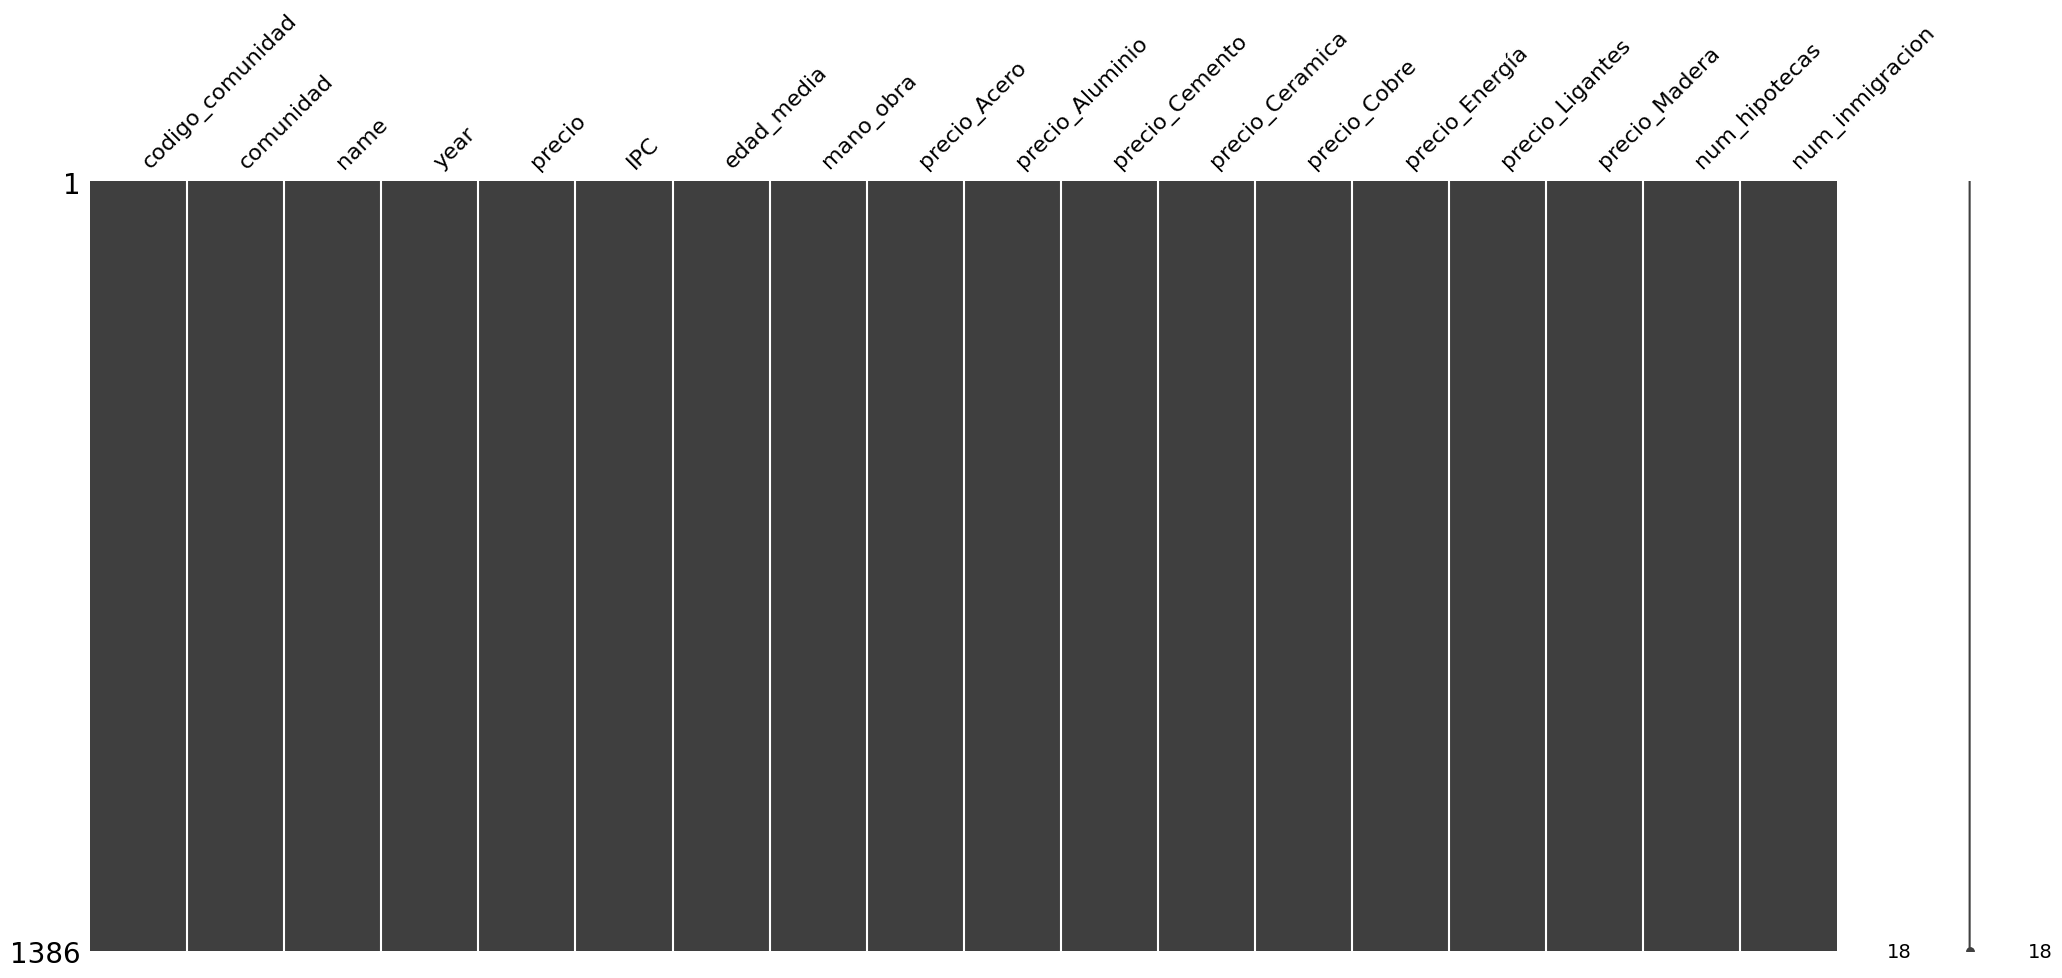

In [13]:
msno.matrix(df_original)

## 1.0.5. Delete unnecessary data: 

In [14]:
df_cleaned = df_original.drop(columns = ["codigo_comunidad", "comunidad", "IPC", "edad_media", "mano_obra", "precio_Acero", "precio_Aluminio", "precio_Cemento", "precio_Ceramica", "precio_Cobre", "precio_Energía", "precio_Ligantes", "precio_Madera", "num_hipotecas", "num_inmigracion"])
df_cleaned

,name,year,precio
0,Andalucía,2003-01-01,995.0
1,Andalucía,2003-04-01,1033.0
2,Andalucía,2003-07-01,1094.0
3,Andalucía,2003-10-01,1133.0
4,Andalucía,2004-01-01,1186.0
...,...,...,...
1381,Región de Murcia,2021-01-01,1024.0
1382,Región de Murcia,2021-04-01,1027.0
1383,Región de Murcia,2021-07-01,1029.0
1384,Región de Murcia,2021-10-01,1043.0


In [15]:
df_cleaned.shape

(1386, 3)

# 1.1. Convert to categorical numeric columns, using label encoding

In [16]:
eda.label_encode_total_data(df_cleaned)

(      name  year  precio
 0        1     1   995.0
 1        1     2  1033.0
 2        1     3  1094.0
 3        1     4  1133.0
 4        1     5  1186.0
 ...    ...   ...     ...
 1381    18    73  1024.0
 1382    18    74  1027.0
 1383    18    75  1029.0
 1384    18    76  1043.0
 1385    18    77  1050.0
 
 [1386 rows x 3 columns],
 {'name': LabelEncoder(), 'year': LabelEncoder()})

# 1.2. General information about measures of central tendency (mean, median, mode) and dispersion (standard deviation, variance, range, interquartile range) for each numerical column:

In [17]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
name,1386.0,9.50000,5.190000,1.0,5.00,9.5,14.0,18.0
year,1386.0,39.00000,22.234133,1.0,20.00,39.0,58.0,77.0
precio,1386.0,1550.49062,533.627206,626.0,1121.25,1463.0,1866.5,3267.0


## 1.3. Remove outliers:

In [18]:
df_cleaned = eda.remove_outliers_igr(df_cleaned, [])
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
name,1386.0,9.50000,5.190000,1.0,5.00,9.5,14.0,18.0
year,1386.0,39.00000,22.234133,1.0,20.00,39.0,58.0,77.0
precio,1386.0,1550.49062,533.627206,626.0,1121.25,1463.0,1866.5,3267.0


In [19]:
df_cleaned.shape

(1386, 3)

# 1.4. Histogram, boxplot and scatterplot of data distribution for each variable:

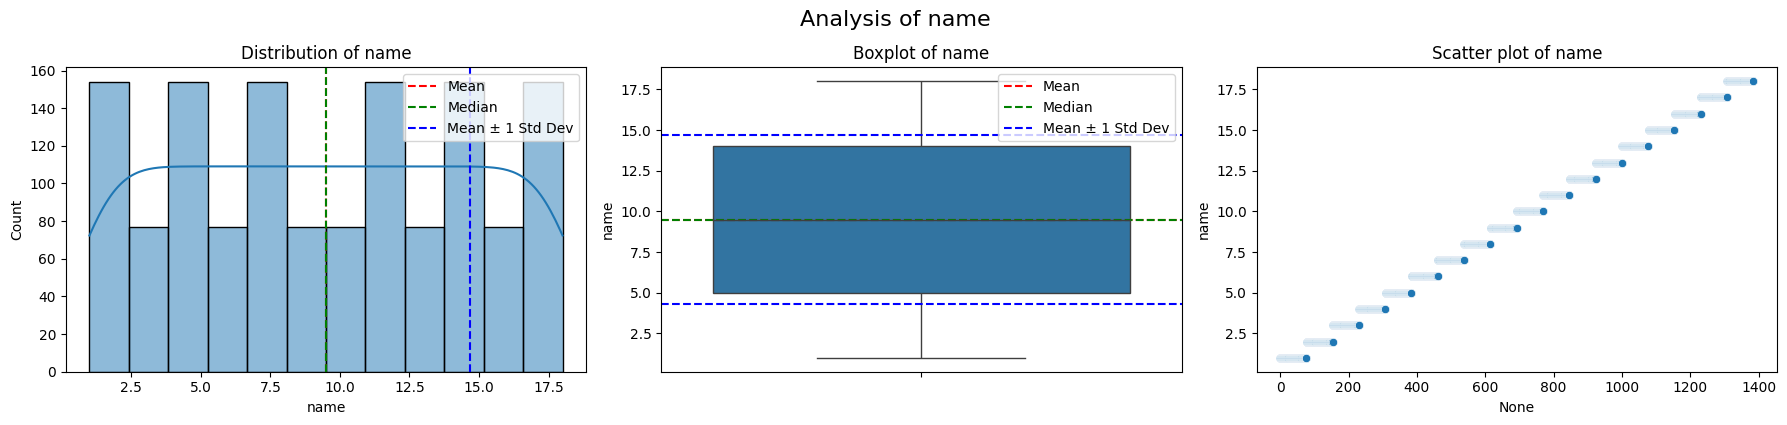

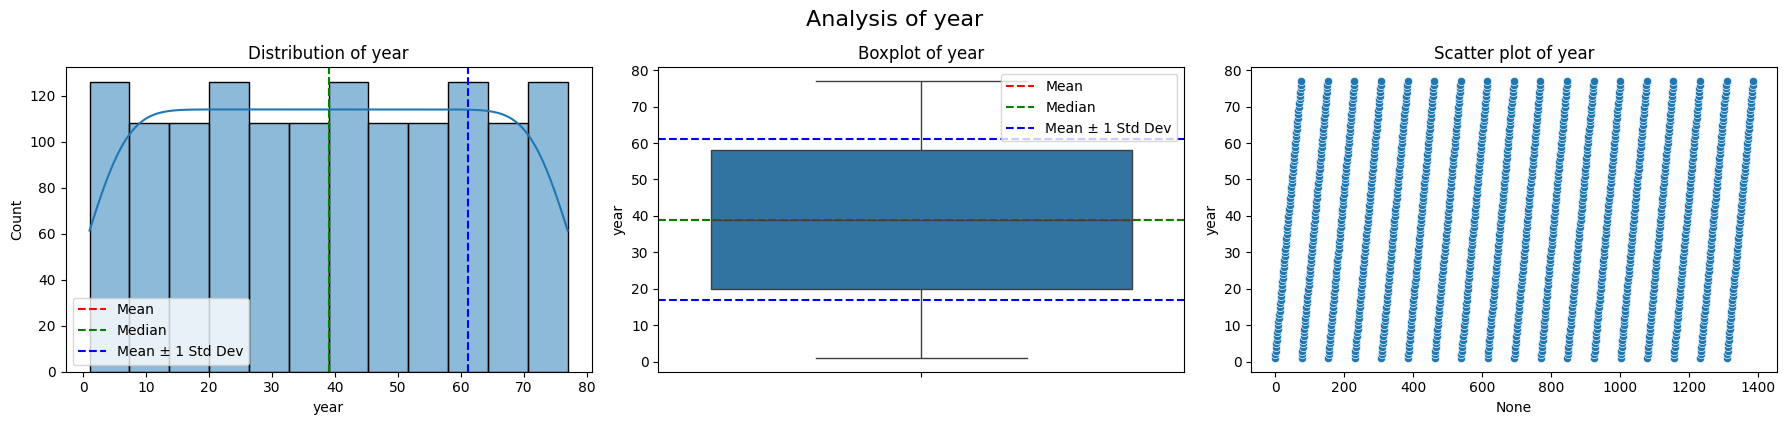

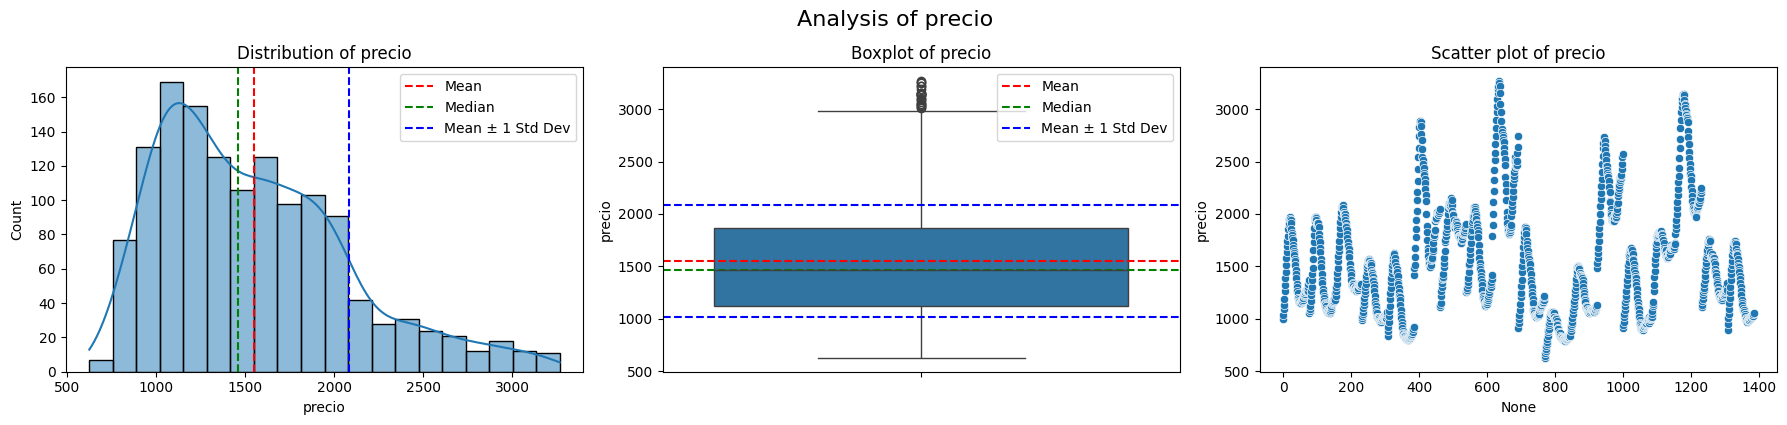

In [20]:
eda.plot_numerical_data(df_cleaned)

# 1.5. Save clean data on CSV

In [22]:
df_cleaned.to_csv("cleaned_data.csv")